In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import h5py
import cv2
from tqdm import tqdm
from pathlib import Path
from uco.data_loader import pivot_df

In [3]:
N = 3698
C = 4
H = 350
W = 525

In [15]:
def read(f):
    path = Path('../data/raw/test_images') / f
    img = cv2.imread(str(path))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return img

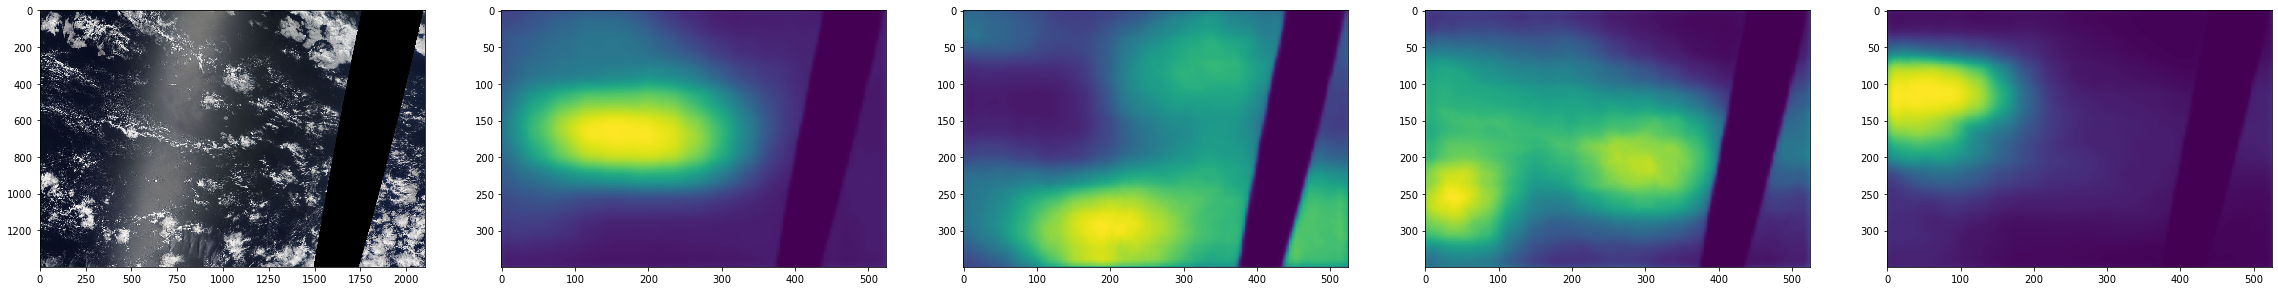

In [26]:
df = pd.read_csv('../data/raw/sample_submission.csv')
idx = np.random.choice(np.arange(df.shape[0] // 4))
with h5py.File('../data/predictions/avg-predictions.h5', 'r') as f:
    p = f['average'][idx, :, :, :]
img_filename = df.iloc[idx * 4]['Image_Label'].split('_')[0]
img = read(img_filename)
fig, axs = plt.subplots(1, 5, figsize=(40, 12))
axs[0].imshow(img)
axs[1].imshow(p[0, :, :])
axs[2].imshow(p[1, :, :])
axs[3].imshow(p[2, :, :])
axs[4].imshow(p[3, :, :])
plt.show()

In [28]:
min_sizes = np.array([9573, 9670, 9019, 7885])
records = []
with h5py.File('../data/predictions/avg-seg-predictions.h5', 'r') as f:
    for th in tqdm(np.linspace(0.3, 0.8, 51)):
        counts = np.zeros((4,))
        for n in range(N):
            mask = (f[k][n, :, :, :] > th).astype(np.uint8)
            for c in range(C):
                counts[c] += (mask[c, :, :].sum() > min_sizes[c]).astype(np.uint8)
        records.append({
            'threshold': th, 
            'c0': counts[0], 
            'c1': counts[1],
            'c2': counts[2],
            'c3': counts[3],
        })
df_seg = pd.DataFrame.from_records(records)
df_seg.head()

100%|██████████| 51/51 [04:00<00:00,  4.71s/it]


,threshold,c0,c1,c2,c3
0,0.30,1979.0,1779.0,2030.0,2790.0
1,0.31,1948.0,1760.0,1996.0,2770.0
2,0.32,1916.0,1744.0,1952.0,2737.0
3,0.33,1883.0,1728.0,1921.0,2703.0
4,0.34,1845.0,1718.0,1878.0,2676.0


In [29]:
df_seg

,threshold,c0,c1,c2,c3
0,0.30,1979.0,1779.0,2030.0,2790.0
1,0.31,1948.0,1760.0,1996.0,2770.0
2,0.32,1916.0,1744.0,1952.0,2737.0
3,0.33,1883.0,1728.0,1921.0,2703.0
4,0.34,1845.0,1718.0,1878.0,2676.0
5,0.35,1817.0,1705.0,1845.0,2651.0
6,0.36,1791.0,1684.0,1811.0,2614.0
7,0.37,1757.0,1668.0,1780.0,2593.0
8,0.38,1733.0,1649.0,1751.0,2558.0
9,0.39,1700.0,1633.0,1724.0,2526.0


In [24]:
records = []
with h5py.File('../data/predictions/avg-clas-predictions.h5', 'r') as f:
    for th in tqdm(np.linspace(0.5, 1.0, 51)):
        counts = np.zeros((4,))
        for n in range(N):
            counts += (f[k][n, :] > th).astype(np.uint8)
        records.append({
            'threshold': th, 
            'c0': counts[0], 
            'c1': counts[1],
            'c2': counts[2],
            'c3': counts[3],
        })
df_clas = pd.DataFrame.from_records(records)
df_clas.head(2)

100%|██████████| 51/51 [00:39<00:00,  1.30it/s]


,threshold,c0,c1,c2,c3
0,0.50,1773.0,1555.0,1795.0,2607.0
1,0.51,1734.0,1530.0,1761.0,2572.0


In [25]:
df_clas

,threshold,c0,c1,c2,c3
0,0.50,1773.0,1555.0,1795.0,2607.0
1,0.51,1734.0,1530.0,1761.0,2572.0
2,0.52,1696.0,1515.0,1724.0,2544.0
3,0.53,1650.0,1502.0,1680.0,2514.0
4,0.54,1613.0,1492.0,1645.0,2474.0
5,0.55,1579.0,1469.0,1610.0,2438.0
6,0.56,1537.0,1450.0,1573.0,2405.0
7,0.57,1493.0,1435.0,1543.0,2354.0
8,0.58,1455.0,1415.0,1518.0,2315.0
9,0.59,1425.0,1397.0,1470.0,2277.0


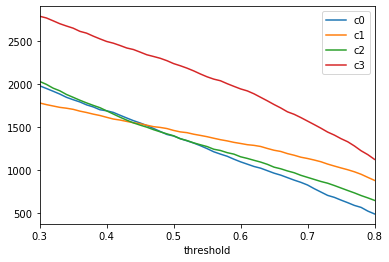

In [30]:
df_seg.set_index('threshold').plot.line()

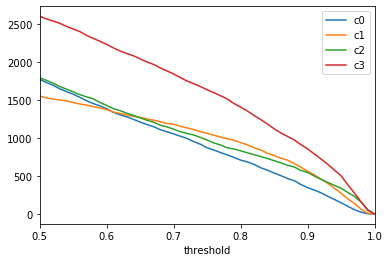

In [31]:
df_clas.set_index('threshold').plot.line()

In [32]:
def compute_threshold(t0, c_factor, classification_output):
    """
    Adjust a threshold based on classification output.

    Parameters
    ----------
    t0 : numeric
        The original pixel threshold
    c_factor : numeric
        The amount a negative classification output will scale the pixel threshold.
    classification_output : numeric
        The output from a classifier in [0, 1]
    """
    return (t0 * c_factor) - (t0 * (c_factor - 1) * classification_output)

In [51]:
min_sizes = np.array([9573, 9670, 9019, 7885]) / 5
c_factor = 9
classification_output = np.array([1.0] * 4)
compute_threshold(
    min_sizes,
    c_factor,
    classification_output
)

array([7658.4, 7736. , 7215.2, 6308. ])